# 한국어 Word2Vec 

위키피디아 한국어 덤프 파일을 다운받아서 한국어로 Word2Vec을 직접 진행해보았습니다.

In [2]:
f = open(r'C:\Users\ashgh\datasets\data\wiki_data.txt', encoding ='utf8')

In [3]:
i=0
while True:
    line = f.readline()
    if line != '\n':
        i=i+1
        print("%d번째 줄 :"%i + line)
    if i==5:
        break 
f.close()

1번째 줄 :<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">

2번째 줄 :지미 카터

3번째 줄 :제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.

4번째 줄 :지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.

5번째 줄 :1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.



In [18]:
from konlpy.tag import Okt  
okt=Okt()
fread = open(r'C:\Users\ashgh\datasets\data\wiki_data.txt', encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []
 
while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함
    
    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
        result.append(temp) # 결과에 저장
fread.close()

5000번째 While문.
10000번째 While문.
15000번째 While문.
20000번째 While문.
25000번째 While문.
30000번째 While문.
35000번째 While문.
40000번째 While문.
45000번째 While문.
50000번째 While문.
55000번째 While문.
60000번째 While문.
65000번째 While문.
70000번째 While문.
75000번째 While문.
80000번째 While문.
85000번째 While문.
90000번째 While문.
95000번째 While문.
100000번째 While문.
105000번째 While문.
110000번째 While문.
115000번째 While문.
120000번째 While문.
125000번째 While문.
130000번째 While문.
135000번째 While문.
140000번째 While문.
145000번째 While문.
150000번째 While문.
155000번째 While문.
160000번째 While문.
165000번째 While문.
170000번째 While문.
175000번째 While문.
180000번째 While문.
185000번째 While문.
190000번째 While문.
195000번째 While문.
200000번째 While문.
205000번째 While문.
210000번째 While문.
215000번째 While문.
220000번째 While문.
225000번째 While문.
230000번째 While문.
235000번째 While문.
240000번째 While문.
245000번째 While문.
250000번째 While문.
255000번째 While문.
260000번째 While문.
265000번째 While문.
270000번째 While문.
275000번째 While문.
280000번째 While문.
285000번째 While문.
290000번째 While문.
295000번째 While문.
300000번째 While문.


In [59]:
len(result)

2678326

In [38]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=0)

In [60]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

In [61]:
a=model.wv.most_similar("대한민국")
print(a)

[('한국', 0.657447099685669), ('재외동포', 0.5228607654571533), ('조선민주주의인민공화국', 0.5200676918029785), ('우리나라', 0.5070163011550903), ('국방홍보원', 0.5008288025856018), ('김태환', 0.4992479085922241), ('스포츠서울', 0.4899907112121582), ('교육인', 0.48500198125839233), ('한국인', 0.484279066324234), ('이호철', 0.4799238443374634)]


In [62]:
b=model.wv.most_similar("어벤져스")
print(b)

[('아이언맨', 0.8610811829566956), ('인크레더블', 0.8175607919692993), ('스파이더맨', 0.8121479749679565), ('솔저', 0.809117317199707), ('스타트렉', 0.7955420017242432), ('다크나이트', 0.7904728055000305), ('앤트맨', 0.7883194088935852), ('원더우먼', 0.7856013178825378), ('엑스맨', 0.7715309858322144), ('트와일라잇', 0.7713654041290283)]


In [63]:
c=model.wv.most_similar("반도체")
print(c)

[('전자부품', 0.7839487791061401), ('집적회로', 0.7784756422042847), ('웨이퍼', 0.7518538236618042), ('태양전지', 0.750259280204773), ('트랜지스터', 0.7290023565292358), ('박막', 0.7279157638549805), ('팹리스', 0.7256043553352356), ('실리콘', 0.7227319478988647), ('마이크론', 0.7202168703079224), ('그래핀', 0.7054033279418945)]


In [64]:
d = model.wv.most_similar("한승우")
print(d)

KeyError: "word '한승우' not in vocabulary"

In [65]:
print(type(model))

<class 'gensim.models.word2vec.Word2Vec'>


In [1]:
import shelve

with shelve.open('w2vmodel.db') as f:
    f['w2vmodel'] = model
    gg = model

NameError: name 'model' is not defined

In [2]:
import shelve
with shelve.open('w2vmodel.db') as f:
    model = f['w2vmodel']
    gg = model

In [3]:
c=gg.wv.most_similar("희망")
print(c)

[('희망이', 0.7194602489471436), ('열망', 0.6957657337188721), ('의지', 0.6703391075134277), ('약속', 0.6642313599586487), ('갈망', 0.6471767425537109), ('소망', 0.6176910400390625), ('기쁨', 0.6098756790161133), ('격려', 0.6047031879425049), ('장래', 0.6046903133392334), ('미래', 0.6046292781829834)]


In [4]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
from matplotlib import font_manager, rc
import gensim
import gensim.models as g

In [5]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

C:\Users\ashgh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


154437
[ 0.02860112  0.16117777 -0.10783311 -0.14250788 -0.02202927  0.02087338
 -0.01337895  0.00067712  0.10174202  0.18853898]


In [6]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [7]:
df.head(10)

,x,y
지미,-4.237150,-6.762316
카터,-3.228777,-4.934778
제임스,-3.855652,-5.553976
얼,-3.680401,-8.430913
주니어,-4.973191,-6.267939
민주당,0.351410,-2.430993
출신,2.666253,-6.100156
미국,-3.319411,-0.449602
대통령,-1.706818,-3.054297
조지아주,-1.654674,-6.881591


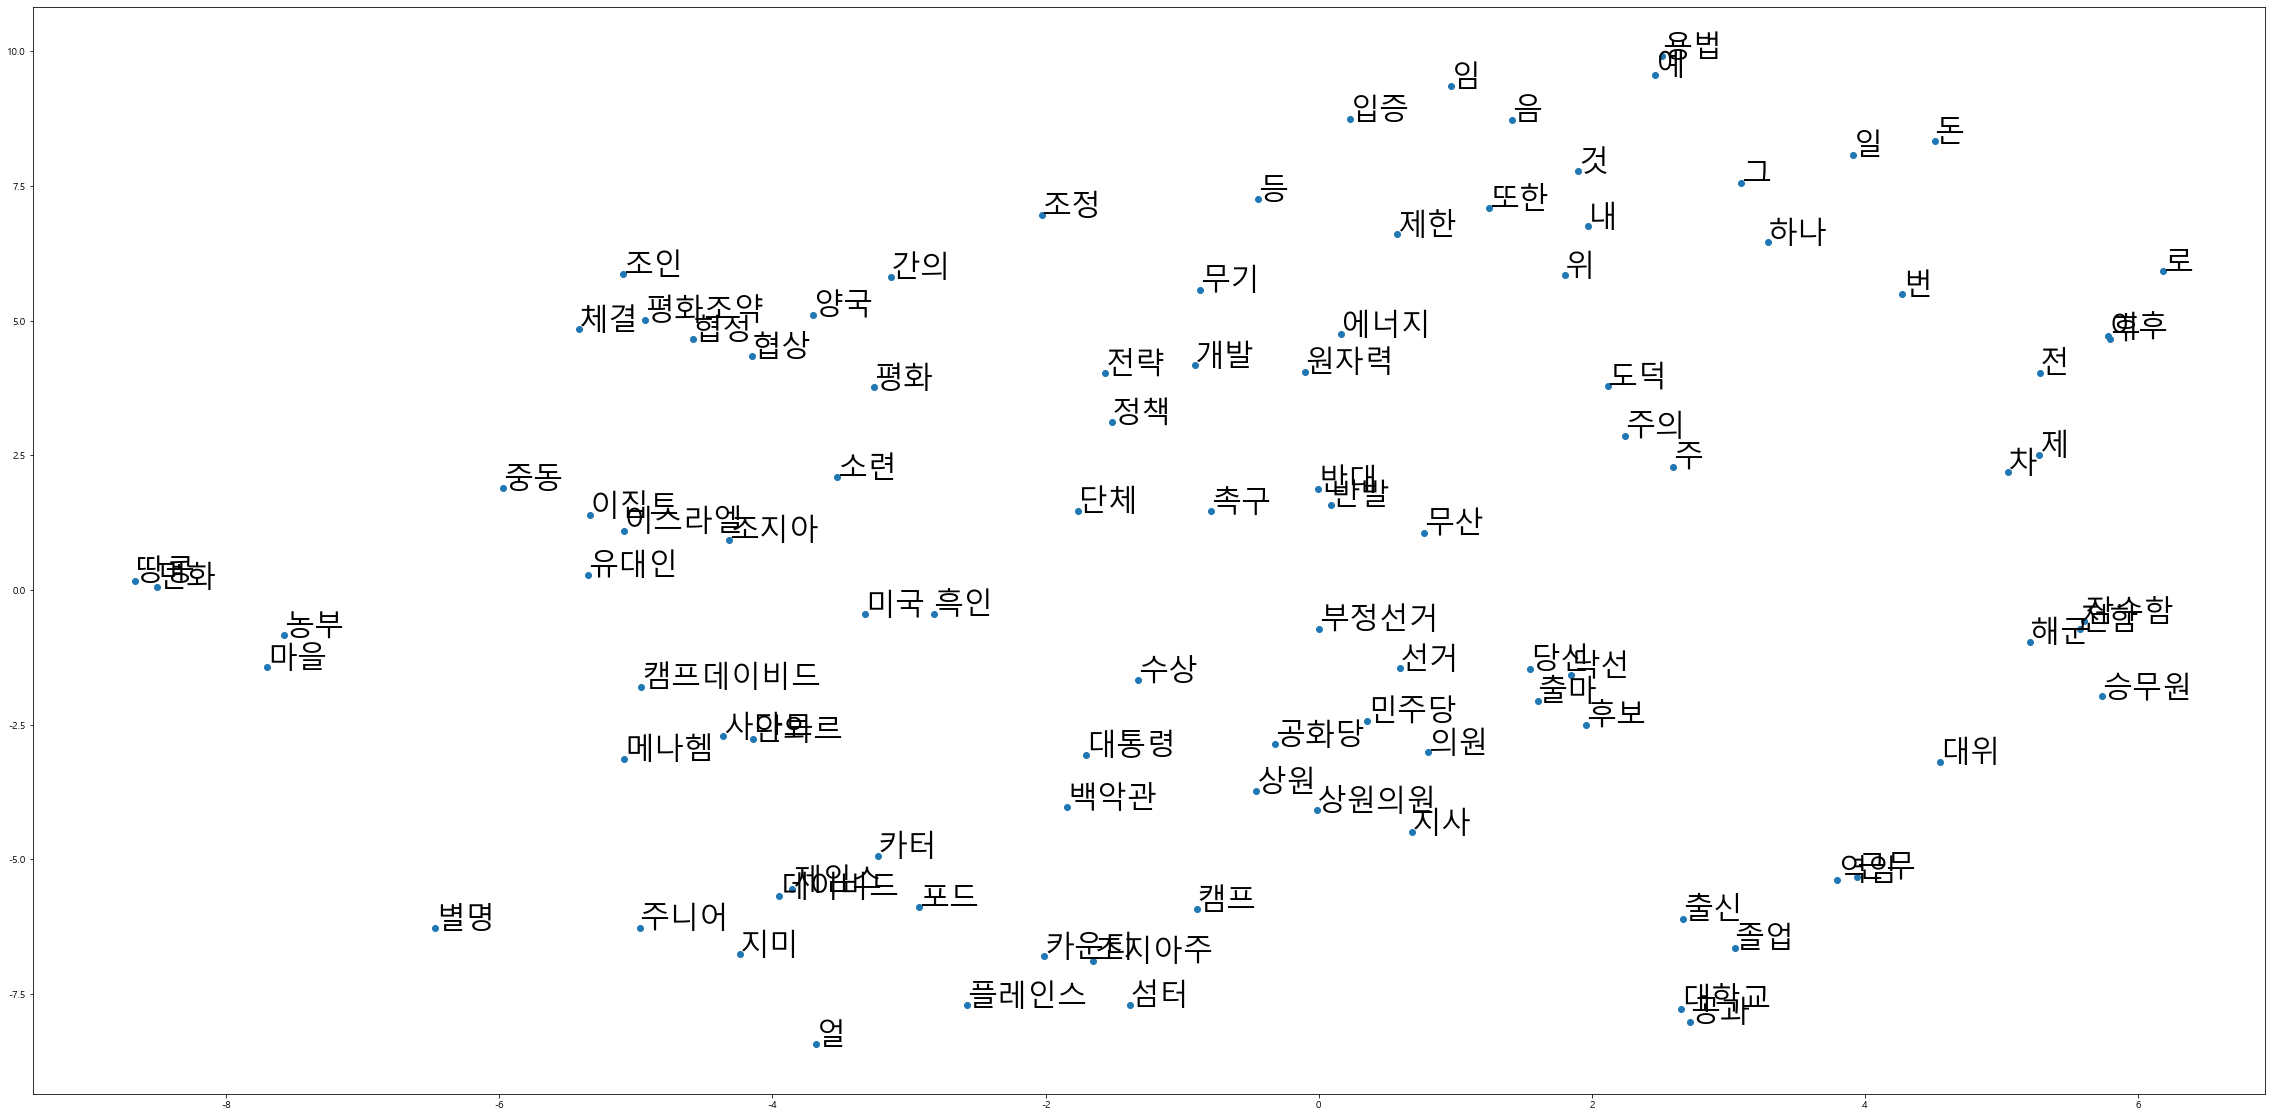

In [8]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()